In [1]:
!python --version

Python 3.9.1


In [2]:
"""
Import the dataset used for the binary classification
The dataset is in csv format so we will use the pandas module to read the csv file into a pandas DataFrame
"""
import pandas as pd
import os
filename="/churn.csv"
os.chdir("../dataset")
dataset=pd.read_csv(os.getcwd()+filename, sep=";")
dataset.head()

c:\users\spano\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\spano\miniconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\spano\miniconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Gender
0,128,25,"265,1","197,4","244,7",10,1,0,0,1,...,"45,07",99,"16,78",91,"11,01",3,"2,7",KS,415,Female
1,107,26,"161,6","195,5","254,4","13,7",1,0,0,1,...,"27,47",103,"16,62",103,"11,45",3,"3,7",OH,415,Female
2,137,0,"243,4","121,2","162,6","12,2",0,0,0,0,...,"41,38",110,"10,3",104,"7,32",5,"3,29",NJ,415,Male
3,84,0,"299,4","61,9","196,9","6,6",2,0,1,0,...,"50,9",88,"5,26",89,"8,86",7,"1,78",OH,408,Male
4,75,0,"166,7","148,3","186,9","10,1",3,0,1,0,...,"28,34",122,"12,61",121,"8,41",3,"2,73",OK,415,Male


In [3]:
"""
Now that we have imported the dataset into a python DataFrame we can explore the data.
First and foremost lets identify the X features (predictors) and the target variable
Target/Dependent variable is the column: Churn which indicates whether or not the customer left the Telco company or rather stayed.
"""
x_features=dataset.loc[:,~dataset.columns.isin(["Churn"])]
y_feature=dataset.loc[:,dataset.columns.isin(["Churn"])]

In [4]:
"""
Explore the X features.
1) Note 1: Sklearn module and most python modules related to data science and machine learning expect features to be numeric representation of vectors.
Thus, having objervations of type objects (strings) it's not acceptable. Those type of predictors should be transformed to numerical vectors.
2) [State, Area Code] are categorical variables. This means that their values represent a label tag. This label tag should be transform into a numerical represantation.
The most common way to handle such types of data is to use One-Hot encoding.
3) The rest of the object variables such as [Day Mins, Eve Mins, etc] are numerical type variables but due to the comma(,) decimal separator csv reader recognised them as objects.
"""
x_features.dtypes

Account Length     int64
VMail Message      int64
Day Mins          object
Eve Mins          object
Night Mins        object
Intl Mins         object
CustServ Calls     int64
Int'l Plan         int64
VMail Plan         int64
Day Calls          int64
Day Charge        object
Eve Calls          int64
Eve Charge        object
Night Calls        int64
Night Charge      object
Intl Calls         int64
Intl Charge       object
State             object
Area Code          int64
Gender            object
dtype: object

In [5]:
"""
Approach 1: Transform selected columns to type float64 using the function .astype(float)
Approach 2: Modify the thousands= argument of the pd.csr reader function.
"""
numerical_features_to_transform=["Day Mins", "Eve Mins", "Night Mins", "Intl Mins", "Day Charge", "Eve Charge", "Night Charge", "Intl Charge"]
x_features[numerical_features_to_transform] = x_features.loc[:,numerical_features_to_transform].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

c:\users\spano\miniconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
"""
The selected predictors were successfully transformed to floats.
"""
x_features.dtypes

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Int'l Plan          int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
State              object
Area Code           int64
Gender             object
dtype: object

In [7]:
"""
Before proceeding to transforming the features: State, Area Code to numerical vectors it's useful to check the number of null values in our predictors.

After results: Hopefully no NA or Null values were detected. Thus, no imputation of values will be applied.
In general for imputation methods we usually prefer to replace null values with the mode or the median value of a column.
Median is mostly preferred over mean/average because the latter is affected by outliers. So, if we aren't sure about the level of outliers in our data it's safer to first try out median.
"""
x_features.isnull().sum() #approach 1
#x_features.isna().sum() #approach 2

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Int'l Plan        0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Gender            0
dtype: int64

In [8]:
"""
Having checked the number of null values in our predictors its time to convert columns: State, Area code to numeric vectors.
Step 1: Count the number of unique values per column. With this step we will take a first glampse of how many new features we will create.
Step 2: Apply one-hot encoding using the pd.get_dummies()
"""
print(f'Unique states: {x_features["State"].nunique()}') #51 states. One-hot encoding the column will generate 51 new columns with values 0,1. So in total the dataset will have 51+20=71 predictors
print(f'Unique genders: {x_features["Gender"].nunique()}')

Unique states: 51
Unique genders: 2


In [9]:
"""
For now we will keep all the 51 states. We want the baseline classifier to be trained on all of our predictors.
But its vital later on our analysis to identify possible states that should be removed based on their contribution in predicting the target variable.
"""
dummy_features=["State", "Gender"]
x_features=pd.get_dummies(x_features, columns=dummy_features)

In [10]:
"""
Moving on with the exploratory data analysis path, we should identify the scale of the numerical predictors.
In cases of high scale difference we should consider standardizing or normalizing the values of the predictors.

After results: Based on the mean value per column, many are the predictors in thousand, hundred or decimal scale.
All the predictors used to feed the baseline model should be on the same scale.
"""
x_features.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Gender_Female,Gender_Male
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,1643.209121,1820.031203,1830.653765,92.503450,1.562856,0.096910,0.276628,100.435644,...,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.498650,0.501350
std,39.822106,13.688365,707.554630,737.022730,720.283738,38.621292,1.315491,0.295879,0.447398,20.069084,...,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.500073,0.500073
min,1.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,1286.000000,1519.000000,1523.000000,75.000000,1.000000,0.000000,0.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,1728.000000,1946.000000,1929.000000,99.000000,1.000000,0.000000,0.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,127.000000,20.000000,2128.000000,2309.000000,2302.000000,118.000000,2.000000,0.000000,1.000000,114.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,243.000000,51.000000,3508.000000,3637.000000,3819.000000,189.000000,9.000000,1.000000,1.000000,165.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
x_features.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'Area Code', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY', 'Gender_Female', 'Gender_Male'],
     

In [12]:
"""
Feature engineering if necessary.
The dataset give us a possibility of creating new features by exploiting the columns of Minutes, Calls and Charges.
Those three aforementioned columns are separated into Day, Eve, Night. So we can concatenate them into a union column to include the daily Minutes, Calls and Charges per customer.
"""
x_features["UnionMinutes"] = x_features["Day Mins"] + x_features["Eve Mins"] + x_features["Night Mins"]
x_features["UnionCalls"] = x_features["Day Calls"] + x_features["Eve Calls"] + x_features["Night Calls"]
x_features["UnionCharges"] = x_features["Day Charge"] + x_features["Eve Charge"] + x_features["Night Charge"]

In [13]:
"""
Scale X features.
Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.
And since we did not include any outlier detection yet we will use RobustScaler.
"""
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rob_scaler = RobustScaler()
norm_scaler = MinMaxScaler()

rob_scaled_x_features = rob_scaler.fit_transform(x_features.values)
rob_scaled_x_features = pd.DataFrame(rob_scaled_x_features, columns=x_features.columns.tolist())
rob_scaled_x_features.head()

norm_scaled_x_features = norm_scaler.fit_transform(x_features.values)
norm_scaled_x_features = pd.DataFrame(norm_scaled_x_features, columns=x_features.columns.tolist())
norm_scaled_x_features.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Gender_Female,Gender_Male,UnionMinutes,UnionCalls,UnionCharges
0,0.524793,0.490196,0.755701,0.542755,0.636460,0.052910,0.111111,0.0,1.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.794203,0.504505,0.781645
1,0.438017,0.509804,0.460661,0.537531,0.662162,0.724868,0.111111,0.0,1.0,0.745455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.678147,0.635135,0.589670
2,0.561983,0.000000,0.693843,0.333242,0.418919,0.645503,0.000000,0.0,0.0,0.690909,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.575916,0.630631,0.525272
3,0.342975,0.000000,0.853478,0.170195,0.509804,0.349206,0.222222,1.0,0.0,0.430303,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.613510,0.270270,0.186987
4,0.305785,0.000000,0.475200,0.407754,0.483307,0.534392,0.333333,1.0,0.0,0.684848,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.545234,0.756757,0.521170


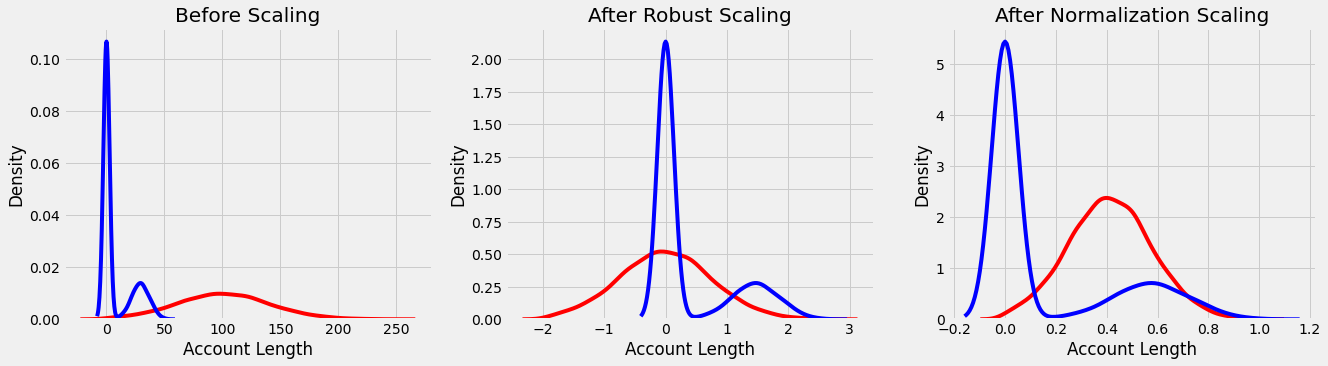

In [14]:
"""
Plot the scaled features Before and After scaling
"""
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_features['Account Length'], ax = ax1, color ='r')
sns.kdeplot(x_features['VMail Message'], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')
sns.kdeplot(rob_scaled_x_features['Account Length'], ax = ax2, color ='red')
sns.kdeplot(rob_scaled_x_features['VMail Message'], ax = ax2, color ='blue')

ax3.set_title('After Normalization Scaling')
sns.kdeplot(norm_scaled_x_features['Account Length'], ax = ax3, color ='red')
sns.kdeplot(norm_scaled_x_features['VMail Message'], ax = ax3, color ='blue')

plt.show()

In [15]:
"""
At this point the x_features have been scaled, checked for nulls, one-hot encoded, and enriched with extra features.
It's time to take a look at the target variable (y).

After result: The data are imbalanced in favor of the customers who were loyal to the company. So we should stratify the data split instead of only randomly split the data.

IMPORTANT NOTE: The target feature for a binary classification should be labelled as 0,1. In case the tags are categorical labels they should be accordingly replaced by 0 and 1.
This action will help a lot later in fitting and evaluating a model classifier.
"""
round(y_feature.value_counts()/y_feature.shape[0]*100,2)

Churn
0        85.51
1        14.49
dtype: float64

In [16]:
"""Apply train test split"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rob_scaled_x_features.values, y_feature.values, test_size=0.25, random_state=123, shuffle=True, stratify=y_feature.values)

In [17]:
"""
We successfully splited the dataset in similar stratified samples, with each one carrying the same ratio imbalance per class.
"""
import numpy as np
print(f"Label ratio in y train: {[round(ele/y_train.shape[0]*100,2) for ele in np.unique(y_train, return_counts=True)[1].tolist()]}")
print(f"Label ration i y test: {[round(ele/y_test.shape[0]*100,2) for ele in np.unique(y_test, return_counts=True)[1].tolist()]}")

Label ratio in y train: [85.51, 14.49]
Label ration i y test: [85.49, 14.51]


In [209]:
"""Train a baseline classifier"""
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression(random_state=0)
fit_model=lg_model.fit(X_train, y_train.ravel())

In [210]:
"""Evaluate baseline's model prediction power"""
y_pred=fit_model.predict(X_test)
y_pred_proba=fit_model.predict_proba(X_test)
y_positive_tag_pred=(y_pred_proba[:, 1]>0.5).astype(int)
y_positive_tag_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [202]:
recall_score(y_test, y_pred, pos_label=1) #by default recall is calculated for the positive class. Based on sklearn documentation.

0.19834710743801653

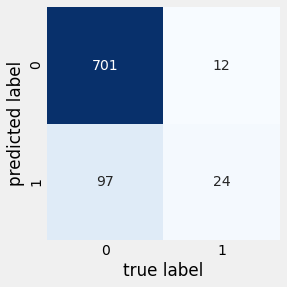

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

<AxesSubplot:>

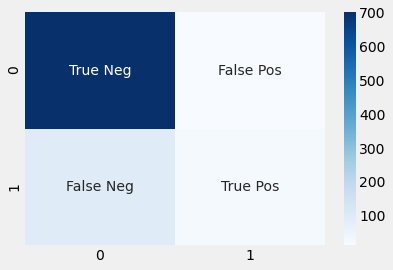

In [21]:
"""
The baseline model cannot identify those customers that left the company. We have many false Negatives. 
Although we dont tolerate false negatives because we want to identify all the customers that are about to leave.
The 97 False Negatives are the baseline of our epxeriment. We will try to develop methods and algorithms to minimize the number of FN.
"""
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [22]:
"""
An alternative and more informative approach to confusion matrix using code from this repo: 
https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall = cf[1,1] / sum(cf[1,:])
            f1_score = 2*precision*recall / (precision + recall)
            stats_text = " ({}) \n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                categories[1],accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('\nPredicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

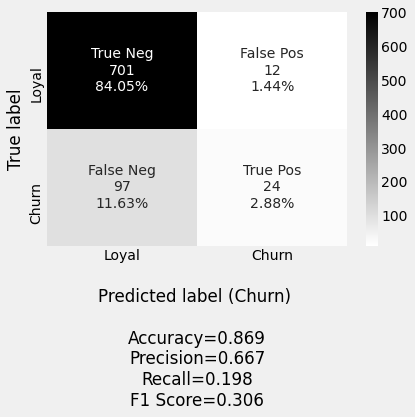

In [23]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Loyal', 'Churn']
make_confusion_matrix(mat,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [24]:
"""Create the classification report"""
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Loyal", "Churn"]))

              precision    recall  f1-score   support

       Loyal       0.88      0.98      0.93       713
       Churn       0.67      0.20      0.31       121

    accuracy                           0.87       834
   macro avg       0.77      0.59      0.62       834
weighted avg       0.85      0.87      0.84       834



In [211]:
"""
Calculate false negative ratio.
The false negative rate is the proportion of the individuals with a known positive condition for which the test
result is negative. 
This rate is sometimes called the miss rate.

After results: The false negative rate of the baseline classifier is relatively high. This means that our classifier missed over 80% of the Churn customers.
"""
def fnr(confusion_matrix_predictions):
    tn, fp, fn, tp = confusion_matrix_predictions.ravel()
    fnr_rate = fn/(tp+fn)
    return round(fnr_rate,4)

print(f"False positive rate of baseline classifier: {fnr(mat)}")

False positive rate of baseline classifier: 0.8017


In [212]:
dictionary_of_comparison_scores = {}
dictionary_of_comparison_scores |= {'fnr-logistic-baseline': fnr(mat),
                                    'recall-logistic-baseline': round(recall_score(y_test.ravel(), y_pred),4)
                                   }
dictionary_of_comparison_scores

{'fnr-logistic-baseline': 0.8017, 'recall-logistic-baseline': 0.1983}

In [213]:
"""
Calculate the bias and variance of the classifier. Bias-variance tradeoff will help us to identify if the dataset is over or under fitted
After result: Both bias and variance converge towards zero. This is a good sign about the overfit or underfit of the model classifier.
Even though bias-variance tradeoff is a good measure for model evaluate and generalization. Here its power is low due to
great imbalance in the dataset. The baseline classifier tends to favor the negative -0- class by achieving a high accuracy.
However, since we value the most False Negative ratio and recall. Baseline classifier has poor predictions over the positive class -1- Churn customers.
"""
def get_bias(predicted_values, true_values):
    """ Calculates model bias:param predicted_values: values predicted by the model
    :param true_values: true target values for the data
    :return: integer representing the bias of the model
    """

    return np.round(np.mean((predicted_values - true_values) ** 2), 4)

def get_variance(values):
    """ Calculates variance of an array of values:param values: array of values
    :return: integer representing the variance of the values
    """

    return np.round(np.var(values), 0)

print(f"baseline model bias: {get_bias(y_pred, y_test.ravel())}")
print(f"baseline model variance: {get_variance(y_pred)}")

baseline model bias: 0.1307
baseline model variance: 0.0


Result-F2 score: precision=0.667, recall=0.198, fbeta=0.231
Baseline PR AUC: 0.471


{'fnr-logistic-baseline': 0.8017,
 'recall-logistic-baseline': 0.1983,
 'PR AUC-logistic-baseline': 0.4711,
 'F2-measure-logistic-baseline': 0.2308}

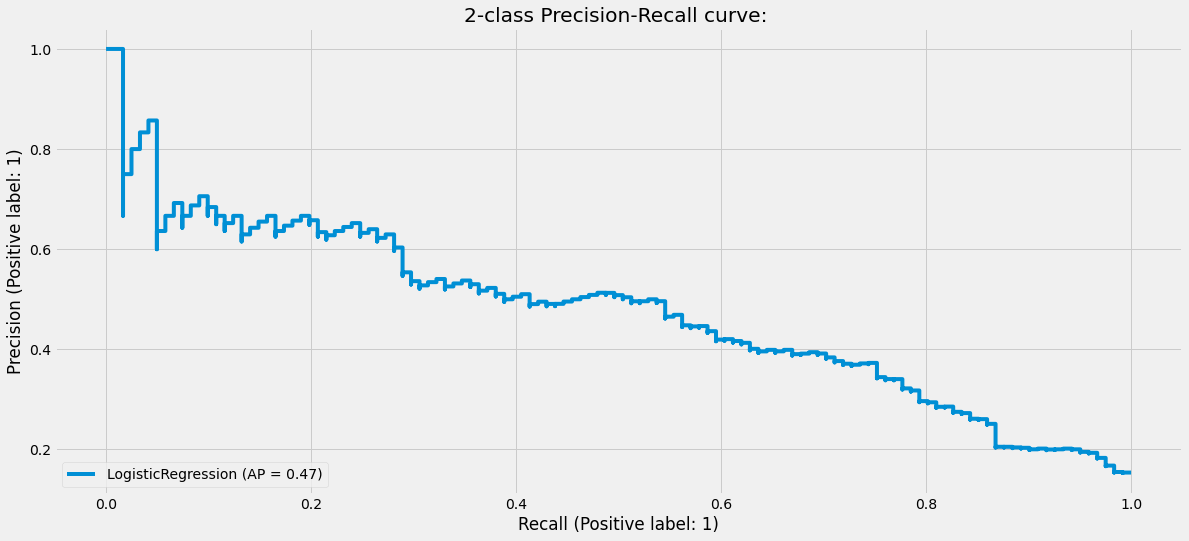

In [214]:
"""
So far, to evaluate the baseline model classifier we used the following methods:

1) Classification report to calculate Accuracy, Recall, Precision, F1-score (harmonic mean of Precision and Recall)
2) False Negative Ratio
3) Bias-Variance tradeoff

Binary classification cannot stop on those three evaluation metrics. Based on our case of greately imbalanced cases of positive labels we can exploit and evaluate the model classifier using the following two measures:
4) Precision-Recall Curve
5) F2-Measure
Those two extra measures come in handy to evaluate the performance of a binary classifier when the positive class is more important than the negative class

ROC AUC vs Precision Recall curve:
A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.
Each threshold is a point on the plot and the points are connected to form a curve. 
A classifier that has no skill (e.g. predicts the majority class under all thresholds) will be represented by a diagonal line from the bottom left to the top right.

F-measure vs Fbeta-measure
The F-measure balances the precision and recall.

On some problems, we might be interested in an F-measure with more attention put on precision, such as when false positives are more important to minimize, but false negatives are still important.

On other problems, we might be interested in an F-measure with more attention put on recall, such as when false negatives are more important to minimize, but false positives are still important.
The solution is the Fbeta-measure.

Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
this beta value adjust the importance on precision and recall.

Three common values for the beta parameter are as follows:

F0.5-Measure (beta=0.5): More weight on precision, less weight on recall.
F1-Measure (beta=1.0): Balance the weight on precision and recall.
F2-Measure (beta=2.0): Less weight on precision, more weight on recall.

After result: As we expected, the F2-measure is low because it favors recall and False Negatives. Since FNR is low, so we would expect f2-measure to be. Thus, we should try to fix this value.
"""

from sklearn.metrics import fbeta_score, recall_score, precision_score
    
f2_measure_baseline_clf = fbeta_score(y_true = y_test.ravel(), y_pred = y_pred, beta = 2.0)
precision_clf = precision_score(y_test.ravel(), y_pred)
recall_clf = recall_score(y_test.ravel(), y_pred)
print('Result-F2 score: precision=%.3f, recall=%.3f, fbeta=%.3f' % (precision_clf, recall_clf, f2_measure_baseline_clf))

from sklearn.metrics import plot_precision_recall_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Plot the Precision-Recall Curve
plt.rcParams["figure.figsize"] = (18,8)
disp = plot_precision_recall_curve(fit_model, X_test, y_test.ravel())
disp.ax_.set_title('2-class Precision-Recall curve: ')

# Calculate the Rrecision-Recall auc score
y_proba = fit_model.predict_proba(X_test)
positive_class_probs = y_proba[:, 1] #positive label are the Churners.
precision, recall, _ = precision_recall_curve(y_test.ravel(), positive_class_probs)
auc_score = auc(recall, precision)
print('Baseline PR AUC: %.3f' % auc_score)
dictionary_of_comparison_scores |= {'PR AUC-logistic-baseline': round(auc_score,4),
                                    'F2-measure-logistic-baseline': round(fbeta_score(y_true = y_test.ravel(), y_pred = y_pred, beta = 2.0),4)}
dictionary_of_comparison_scores

In [28]:
"""
Those two extra evaluation methodologies: F2-score (Fbeta measure with beta=2.0), and Precision-Recall curve, 
conclude the evaluation of the baseline binary model classifier.

The five evaluation steps can also be used later to evaluate more sophiticated classifiers like Support Vector Machines and Decision Trees.
Keep in mind that our goal is unique: Minimize the False Negative Ratio or maximize the ability of the classifier to correctly identify all the positive -1- (aka recall), customers (churners).
"""

'\nThose two extra evaluation methodologies: F2-score (Fbeta measure with beta=2.0), and Precision-Recall curve, \nconclude the evaluation of the baseline binary model classifier.\n\nThe five evaluation steps can also be used later to evaluate more sophiticated classifiers like Support Vector Machines and Decision Trees.\nKeep in mind that our goal is unique: Minimize the False Negative Ratio or maximize the ability of the classifier to correctly identify all the positive -1- (aka recall), customers (churners).\n'

In [215]:
"""
We can follow different solution paths to reach our goal. Some of the paths we can follow are:

1) Train a more suited algorithm using cross validation and hyper-parameter tuning, keeping the same number of features.
2) Train a more sophisticated algorithm, after selecting the most important features. Use feature selection techniques like Lasso, PCA, AIC
3) Train a random forest algorith, and identify the most important features.
"""
print(f"Number of features: {x_features.shape[1]}") #74 columns are now being consider to estimate the probability of a customer to stop using company's telco package.

Number of features: 74


In [216]:
"""
n = number of features,
m = number of training examples

1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.

2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel.

3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel.
Generally, it is usually advisable to first try to use logistic regression to see how the model does.
If it fails then you can try using SVM without a kernel (is otherwise known as SVM with a linear kernel).
Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.

Scenario path 1: Train a more suited algorithm using hyper parameter tuning, keeping the same number of features.
-> Train Logistic Regression by using a different solver instead of the default one ('lbfgs').
-> Train Support Vectors Machines with hyper parameter tuning to identify the parameters that will identify the best model classifier.

Hyper-parameter tuning is a very useful tool to train and test different parameters per model classifier. With hyper-parameter tuning we can test different parameter combinations and select the one that best fits our data.
Cross Validation is a very useful technique to include an out-of-fold dataset that will be used to evaluate the ability of the model classifier to perfectly distinguish the churners -positive class- from the loyal -negative class- customers.

Cross validation is a sophisticated method to train and test model estimators in machine learning that will outplay the predictions of a baseline model.
Also to make thinks more compact we can add them into a pipeline object offered by sklearn library.

* Pipelines will be a concepts developed later to make our machine learning solution more compact. For we develop each step individually.
"""
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

parameters_grid = {
                    'C':[0.001, 0.01, 0.5, 1.0, 1.5],
                    'gamma':[0.001, 0.01, 0.1, 0.5],
                    'kernel':('linear', 'rbf', 'poly')
                  }

scoring = {
            'accuracy': 'accuracy',
            'f1_scoring': 'f1',
            'precision_scoring': 'precision',
            'recall_scoring': 'recall'
          }
refit_score=list(scoring.keys())[list(scoring.values()).index('recall')]
#create stratified and shuffled cross validation rounds
ss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=123)
#create the gridsearch object of the svm classifier that will be fitted on the data
svm_gs = GridSearchCV(estimator=SVC(random_state=123, probability=True), 
                                param_grid=parameters_grid, 
                                cv = ss, 
                                verbose=1, 
                                n_jobs = -1, 
                                scoring=scoring, 
                                refit="recall_scoring", 
                                return_train_score=True)
#fit the gridsearch object
svm_gs.fit(X_train, y_train.ravel())
#make predictions
y_pred=svm_gs.best_estimator_.predict(X_test)
positive_class_probs = svm_gs.best_estimator_.predict_proba(X_test)[:, 1] #positive label are the Churners.
precision, recall, _ = precision_recall_curve(y_test.ravel(), positive_class_probs)
svm_auc_score = auc(recall, precision)
confusion_matrix_values = confusion_matrix(y_test.ravel(), y_pred)

print(f'\nbest parameters : {svm_gs.best_params_}',
      f'\n{refit_score} best score: {svm_gs.best_score_}',
      f'\nFalse Negative Ratio of SVM classifier: {fnr(confusion_matrix_values)}')

dictionary_of_comparison_scores |= {
                                    'fnr-svm': fnr(confusion_matrix_values),
                                    'recall-svm': round(svm_gs.best_score_,4)
                                   }
dictionary_of_comparison_scores |= {
                                    'Δ (fnr) baseline-svm': [str(dictionary_of_comparison_scores['fnr-logistic-baseline'] - dictionary_of_comparison_scores['fnr-svm'])+" (improvement)" if dictionary_of_comparison_scores['fnr-logistic-baseline'] - dictionary_of_comparison_scores['fnr-svm']>0 else str(dictionary_of_comparison_scores['fnr-logistic-baseline'] - dictionary_of_comparison_scores['fnr-svm']) + " (deterioration)"][0],
                                    'Δ (recall) baseline-svm': [str(round((dictionary_of_comparison_scores['recall-logistic-baseline'] - dictionary_of_comparison_scores['recall-svm'])*-1,4)) + " (improvement)" if dictionary_of_comparison_scores['recall-logistic-baseline'] - dictionary_of_comparison_scores['recall-svm']<0 else str(round((dictionary_of_comparison_scores['recall-logistic-baseline'] - dictionary_of_comparison_scores['recall-svm'])*1,4)) + " (deterioration)"][0]
                                   }
dictionary_of_comparison_scores |= {'PR AUC-svm': round(svm_auc_score,4),
                                    'F2-measure-svm': round(fbeta_score(y_true = y_test.ravel(), y_pred = y_pred, beta = 2.0),4)}
results=svm_gs.cv_results_
results_dataframe=pd.DataFrame.from_dict(results)
best_model_index=results['params'].index(svm_gs.best_params_)

print(f'\n{dictionary_of_comparison_scores}')
print(f'\nsvm model bias: {get_bias(y_pred, y_test.ravel())}',
      f'\nsvm model variance: {get_variance(y_pred)}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits

best parameters : {'C': 0.5, 'gamma': 0.5, 'kernel': 'poly'} 
recall_scoring best score: 0.4813186813186813 
False Negative Ratio of SVM classifier: 0.5124

{'fnr-logistic-baseline': 0.8017, 'recall-logistic-baseline': 0.1983, 'PR AUC-logistic-baseline': 0.4711, 'F2-measure-logistic-baseline': 0.2308, 'fnr-svm': 0.5124, 'recall-svm': 0.4813, 'Δ (fnr) baseline-svm': '0.2893 (improvement)', 'Δ (recall) baseline-svm': '0.283 (improvement)', 'PR AUC-svm': 0.485, 'F2-measure-svm': 0.5026}

svm model bias: 0.1271 
svm model variance: 0.0


In [190]:
"""
From the updated dictionary that logs the two measures of our interest (i.e. fnr, recall, f2-measure), we can see that all the three measures
improved respectively. FNR dropped which is what we want, also recall increased for the positive class and finally since recall improved so as the F2-meaure improved by 51%.

Model's bias and variance still remain unaffected due to the high accuracy of the model classifier over the negative -0- class (aka the loyal customers). 
This should not affect our judgement because our goal is improve two different measures (1. recall, 2. fnr, 3. F2-measure).

So we can conclude that Hyper-parameter tuning and Cross-Validation helped SVM to make better predictions over the positive class.
Next we can try to apply the same methodology for Logistic Regression. Hyper-parameter some core variables of Logistic Regression and Cross-Validate the model classifier for better predictions.

We can now build a more sophisticate algorithm than both the SVM and logistic regression. The more sophisticated algorithm that we choose is the Random Forest classifier.
"""

"\nFrom the updated dictionary that logs the two measures of our interest (i.e. fnr, recall), we can see that both measures\nimproved respectively. FNR dropped which is what we want and also recall increased for the positive class.\n\nModel's bias and variance still remain unaffected due to the high accuracy of the model classifier over the negative -0- class (aka the loyal customers). \nThis should not affect our judgement because our goal is improve two different measures (1. recall, 2. fnr).\n\nSo we can conclude that Hyper-parameter tuning and Cross-Validation helped SVM to make better predictions over the positive class.\nNext we can try to apply the same methodology for Logistic Regression. Hyper-parameter some core variables of Logistic Regression and Cross-Validate the model classifier for better predictions.\n"

In [191]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds.
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold. This ensures that the graph starts on the
    y axis.
    
  